In [1]:
import os
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from pynamix import io, data, measure, color, plotting, exposure
virino = color.virino()

%matplotlib inline

## Load example data

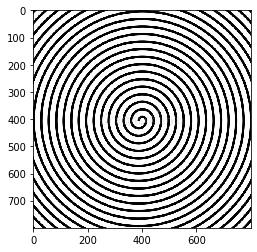

In [26]:
io.download_file('https://thumbs.dreamstime.com/b/hypnos-circles-concentric-abstract-texture-vector-illustration-hypnotic-swirl-spiral-background-137959483.jpg','spiral.jpg') # download an image from the internet
im = rgb2gray(plt.imread('spiral.jpg')) # load an image and convert to grayscale
logfile = {} # needed for loading/manipulating radiographs, not used here
ims = np.expand_dims(im,0) # make into a 3D array to conform with pynamix convention

## Show example data

In [ ]:
plt.imshow(ims[0],cmap='gray') # show the first 'frame' in the video (i.e. the only image)
plt.show()

## (Optionally) apply an ROI

In [27]:
# ims, logfile = exposure.apply_ROI(ims, logfile, left=600)

## Calculate orientation field

In [32]:
patchw=64
X,Y,orient,dzeta = measure.orientation_map(ims,logfile,patchw=patchw,xstep=patchw//4,ystep=patchw//4)

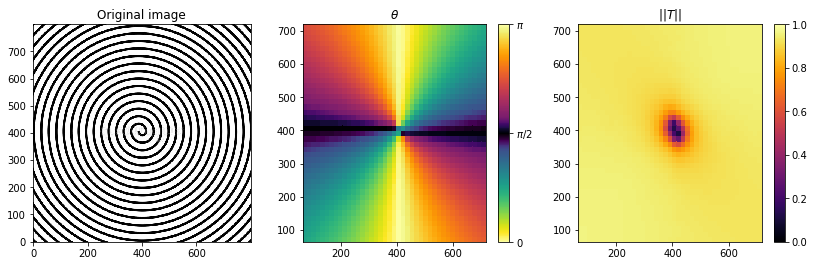

In [33]:
fig = plt.figure(figsize=[14,4])

plt.subplot(131)
plt.title('Original image')
plt.imshow(ims[0],origin='lower',cmap='gray')

plt.subplot(132)
plt.title(r'$\theta$')
plt.pcolormesh(X,Y,orient[0],cmap=virino,vmin=0,vmax=np.pi)
cb = plt.colorbar()
cb.set_ticks([0,np.pi/2.,np.pi])
cb.set_ticklabels([r'$0$',r'$\pi/2$',r'$\pi$'])

plt.subplot(133)
plt.title(r'$||T||$')
plt.pcolormesh(X,Y,dzeta[0],vmin=0,vmax=1)
plt.colorbar()
plt.show()